In [14]:
import numpy
import sys
!{sys.executable} -m pip install chaospy==3.2.0
!{sys.executable} -m pip install matplotlib
import chaospy
from scipy.integrate import odeint
from matplotlib import pyplot

In [15]:
class CoffeeCup:
    def __init__(self, time_points, max_time):
        self.time_points = time_points
        self.max_time = max_time

    def solve(self, T_0,kappa,T_env):
        time = numpy.linspace(0, self.time_points, self.max_time)  # Minutes

        # The equation describing the model
        def f(T, time, kappa, T_env):
            return -kappa * (T - T_env)

        # Solving the equation by integration
        temperature = odeint(f, T_0, time, args=(kappa, T_env))[:, 0]
        return temperature
    def exact(self, U_0, a):
        return U_0 * numpy.exp(a * self.x)

In [16]:
def run_solver(kappa, T_env):

    max_time, time_points, T_0 = 150, 200, 95
    model = CoffeeCup(time_points, max_time)
    solutions = model.solve(T_0, kappa, T_env)
    return [solutions[10],solutions[-1]]


In [22]:
order = 3

In [23]:
kappa_dist ,T_env_dist = chaospy.Uniform(0.025, 0.075), chaospy.Uniform(15, 25)
joint = chaospy.J(kappa_dist, T_env_dist)
ort = chaospy.orth_ttr(order,joint)
print(ort)

#kappa_dist     = chaospy.Normal(0, 1)
#T_env_dist     = chaospy.Normal(0, 1)


[1.0 q1-20.0 q0-0.05 q1**2-40.0*q1+391.6666666666667
 q0*q1-0.05*q1-20.0*q0+1.0 q0**2-0.1*q0+0.002291666666666667
 q1**3-60.0*q1**2+1185.0*q1-7700.000000000001
 q0*q1**2-0.05*q1**2-40.0*q0*q1+2.0*q1+391.6666666666667*q0-19.583333333333336
 q0**2*q1-0.1*q0*q1-20.0*q0**2+0.002291666666666667*q1+2.0*q0-0.045833333333333344
 q0**3-0.15000000000000002*q0**2+0.007125000000000002*q0-0.00010625000000000002]


In [24]:
kappa_dist ,T_env_dist = chaospy.Uniform(0.025, 0.075), chaospy.Normal(15, 25)
joint = chaospy.J(kappa_dist, T_env_dist)
ort = chaospy.orth_ttr(order,joint)
print(ort)

[1.0 q1-15.0 q0-0.05 q1**2-30.0*q1-400.0 q0*q1-0.05*q1-15.0*q0+0.75
 q0**2-0.1*q0+0.002291666666666667 q1**3-45.0*q1**2-1200.0*q1+24750.0
 q0*q1**2-0.05*q1**2-30.0*q0*q1+1.5*q1-400.0*q0+20.0
 q0**2*q1-0.1*q0*q1-15.0*q0**2+0.002291666666666667*q1+1.5*q0-0.03437500000000001
 q0**3-0.15000000000000002*q0**2+0.007125000000000002*q0-0.00010625000000000002]


In [25]:
joint = chaospy.J(kappa_dist, T_env_dist)
nodes, weights = chaospy.generate_quadrature(order, joint, rule="gaussian")
gauss_evals = numpy.array([run_solver(node[0],node[1]) for node in nodes.T])
quad = chaospy.fit_quadrature(ort, nodes, weights, gauss_evals)

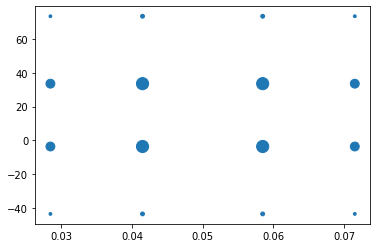

In [26]:
pyplot.scatter(*nodes, s=weights*1e3)

In [29]:
print(quad.round(3))

[-46.417*q0**2*q1-16561.2*q0**3+11.58*q0*q1+6893.761*q0**2+0.026*q1-1218.096*q0+94.295
 -3.973*q0**2*q1-13088.743*q0**3+0.461*q0*q1+2340.763*q0**2+0.987*q1-137.051*q0+2.622]
